# Principal Component Analysis

**Principal Component Analysis (PCA)** is a fundamental dimensionality reduction technique widely used in machine learning, statistics, and data science. It transforms high-dimensional data into a lower-dimensional representation while preserving as much variance (information) as possible.

### What is PCA?

PCA converts a set of possibly correlated variables into a new set of uncorrelated variables called **principal components**. These components are:
- **Orthogonal** (perpendicular) to each other
- **Ordered by variance**: The first component captures the most variance, the second captures the second most, and so on
- **Linear combinations** of the original features

### Why use PCA?

1. **Dimensionality Reduction**: Reduce the number of features while retaining most of the information
2. **Visualization**: Project high-dimensional data onto 2D or 3D for easy visualization
3. **Noise Filtering**: Remove components with low variance that may represent noise
4. **Feature Extraction**: Create new features that are more informative than the originals
5. **Computational Efficiency**: Speed up machine learning algorithms by reducing feature space
6. **Multicollinearity**: Address correlation between features in regression models

### How does PCA work?

The mathematical goal of PCA is to find directions (principal components) that maximize variance:

1. **Standardize the data**: Center and scale each feature to have mean 0 and standard deviation 1
2. **Compute the covariance matrix**: Measure how features vary together
3. **Find eigenvectors and eigenvalues of the covariance matrix**: 
   - Eigenvectors point in the direction of maximum variance (principal components)
   - Eigenvalues indicate how much variance is captured by each component
4. **Project the data**: Transform original data onto the new coordinate system defined by principal components
5. **Select top k components**: Keep only the first k components that explain most of the variance

### Mathematical Foundation

For a data matrix $X$ (n samples × p features, after standardization), the covariance matrix is:

$$C = \frac{1}{n}X^T X$$

PCA finds the eigenvectors $u_1, u_2, \ldots, u_p$ and eigenvalues $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_p$ of $C$. 

Alternatively, PCA can be computed via **Singular Value Decomposition (SVD)**:

$$X = U \Sigma V^T$$

where the columns of $V$ are the principal components, and the variance explained by each component is proportional to the squared singular values in $\Sigma$.

### When to use PCA?

✅ **Good use cases:**
- High-dimensional data with correlated features
- Need to visualize complex data
- Want to speed up machine learning algorithms
- Data exploration and pattern discovery

⚠️ **Considerations:**
- PCA assumes linear relationships
- Standardization is crucial when features have different scales
- Principal components may be hard to interpret (they're combinations of original features)
- PCA is unsupervised and ignores the target variable

In [1]:
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

# Import core libraries for data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configure Seaborn plotting style for consistency across all plots
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {"grid.linestyle": "--"})

## A Simple 2D Example: Visualizing PCA

Let's start with a simple example to build intuition. We'll create a 2D dataset where $x_1$ and $x_2$ are **highly correlated**. 

This is a perfect use case for PCA because:
- The two features contain redundant information
- Most of the variance lies along one diagonal direction
- We can project the 2D data onto a 1D line (the first principal component) without losing much information

In the plot below, notice how the points roughly follow a diagonal pattern. PCA will identify this diagonal direction as the first principal component, allowing us to represent the data with just one coordinate instead of two.

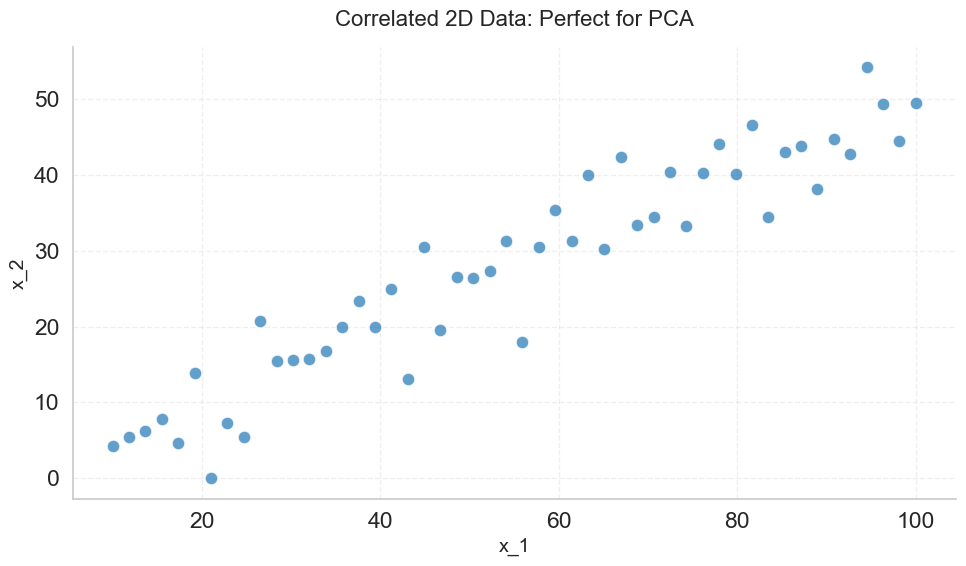

In [2]:
# Generate synthetic 2D data with high correlation
# x1: Linearly spaced values from 10 to 100
x1 = np.linspace(start=10, stop=100, num=50)
# x2: Linear function of x1 with added noise (creates correlation)
x2 = 0.5 * x1 + np.random.normal(scale=5, size=len(x1))

# Create figure with appropriate size for readability
plt.figure(figsize=(10, 6))

# Scatter plot showing the correlated relationship
sns.scatterplot(x=x1, y=x2, s=80, alpha=0.7, color="tab:blue")

# Add labels and title for clarity
plt.gca().set_xlabel("x_1", fontsize=14)
plt.gca().set_ylabel("x_2", fontsize=14)
plt.gca().set_title("Correlated 2D Data: Perfect for PCA", fontsize=16, pad=15)

# Add grid for easier reading
plt.grid(True, alpha=0.3)

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()

## Real-World Example: Auto MPG Dataset

Now let's apply PCA to a real dataset. We'll use the **Auto MPG dataset**, which contains various characteristics of automobiles. 

### Goals:
1. **Perform PCA** on four vehicle features: displacement, horsepower, weight, and acceleration
2. **Compute reconstruction error** for different numbers of components
3. **Understand the trade-off** between dimensionality reduction and information loss

In [3]:
# Load the Auto MPG dataset from GitHub repository
auto = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")

# Remove rows with missing values for simplicity
# In practice, you might want to use imputation instead
auto.dropna(inplace=True)

# Display the first few rows to understand the data structure
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Select the four features we want to analyze
# These features have different scales (e.g., weight is in pounds, acceleration in seconds)
X = auto[["displacement", "horsepower", "weight", "acceleration"]].values

# Initialize the StandardScaler
# This will transform each feature to have mean=0 and standard deviation=1
scaler = StandardScaler()

# Fit the scaler to the data and transform it
# Standardization is CRUCIAL for PCA because:
# 1. PCA is sensitive to feature scales
# 2. Features with larger scales would dominate the principal components
# 3. Standardizing ensures all features contribute fairly
X_scaled = scaler.fit_transform(X)

# Display the scaled data
X_scaled

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]],
      shape=(392, 4))

In [5]:
# Perform PCA using Singular Value Decomposition (SVD)
# We compute the SVD of the covariance matrix (X^T X / n)

n = len(X_scaled)  # Number of samples

# SVD directly on X_scaled
U, S, Vh = np.linalg.svd(X_scaled, full_matrices=False)
principal_components = Vh.T

# Variance explained by each component
variance_explained_direct = (S ** 2) / n

print("Principal Components (V matrix):")
print(principal_components)
print(f"\nThere are {principal_components.shape[1]} principal components for {principal_components.shape[0]} original features")
print("\nEigenvalues (S vector) - variance explained by each component:")
print(variance_explained_direct)

Principal Components (V matrix):
[[-0.53446681  0.2509758  -0.49030387 -0.64106044]
 [-0.54176623 -0.03090597  0.81893423 -0.1867643 ]
 [-0.51276775  0.43914194 -0.15832753  0.72052479]
 [ 0.39737113  0.86209647  0.25274737 -0.18709522]]

There are 4 principal components for 4 original features

Eigenvalues (S vector) - variance explained by each component:
[3.20893718 0.65406182 0.08295314 0.05404786]


In [6]:
# Calculate reconstruction error for different numbers of principal components
# This helps us understand the trade-off between dimensionality reduction and information loss

all_errors = []

# Loop through k = 1, 2, 3, ... up to the total number of components
for k in range(1, len(principal_components) + 1):
    # Step 1: Select the first k principal components
    PC_reduced = principal_components[:, :k]

    # Step 2: Project the data onto these k components
    # This gives us the "compressed" representation in k dimensions
    Z = X_scaled @ PC_reduced

    # Step 3: Reconstruct the original data from the compressed representation
    # This is the "approximation" of the original data using only k components
    X_approx = Z @ PC_reduced.T

    # Step 4: Calculate the reconstruction error
    # This measures how much information we lost by using only k components
    # Error = sum of squared L2 norms of differences / sum of squared L2 norms of originals
    error = (
        np.sum(np.square(np.linalg.norm((X_scaled - X_approx), ord=2, axis=1)))
        / np.sum(np.square(np.linalg.norm(X_scaled, ord=2, axis=1)))
    )

    all_errors.append(error)

# Display the errors for each k
print("Reconstruction errors for k components:")
for k, error in enumerate(all_errors, start=1):
    print(f"k={k}: {error:.6f} ({error*100:.4f}% error, {(1-error)*100:.4f}% variance retained)")

all_errors

Reconstruction errors for k components:
k=1: 0.197766 (19.7766% error, 80.2234% variance retained)
k=2: 0.034250 (3.4250% error, 96.5750% variance retained)
k=3: 0.013512 (1.3512% error, 98.6488% variance retained)
k=4: 0.000000 (0.0000% error, 100.0000% variance retained)


[np.float64(0.19776570529397033),
 np.float64(0.034250250838976794),
 np.float64(0.013511965150122117),
 np.float64(2.6161637714686555e-31)]

### Alternative Method: Computing Error from Eigenvalues

There's a more efficient way to calculate reconstruction error using the eigenvalues directly, without explicitly reconstructing the data.

**Key insight**: The eigenvalues tell us how much variance each principal component captures. Therefore:
- **Variance retained** by first k components = $\frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{p} \lambda_i}$
- **Reconstruction error** (variance lost) = $1 - \text{variance retained}$

This method is computationally much faster, especially for large datasets, because it only requires the eigenvalues rather than projecting and reconstructing the entire dataset.


In [7]:
# Alternative calculation: compute error directly from eigenvalues
# This is much faster and gives the same result!

print("Reconstruction errors using eigenvalue method:")
for i in range(len(S)):
    # Variance retained by first (i+1) components
    variance_retained = np.sum(S[:(i + 1)]) / np.sum(S)

    # Reconstruction error = 1 - variance retained
    error = 1 - variance_retained

    print(f"k={i+1}: {error:.6f} ({error*100:.4f}% error, {variance_retained*100:.4f}% variance retained)")

# Verify that this matches the previous method
print("\n✓ These values should match the previous calculation!")

Reconstruction errors using eigenvalue method:
k=1: 0.425958 (42.5958% error, 57.4042% variance retained)
k=2: 0.166795 (16.6795% error, 83.3205% variance retained)
k=3: 0.074499 (7.4499% error, 92.5501% variance retained)
k=4: 0.000000 (0.0000% error, 100.0000% variance retained)

✓ These values should match the previous calculation!


## Visualizing PCA Results

Let's create visualizations to better understand the PCA results. We'll create:
1. **Scree Plot**: Shows the variance explained by each principal component
2. **Cumulative Variance Plot**: Shows how much total variance is retained as we add more components
3. **Component Projection**: Visualizes the data in the reduced 2D space

These plots help us decide how many principal components to keep.


/var/folders/rt/36nfwnl51cn18rhjj7802x600000gp/T/ipykernel_37321/92550038.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=component_numbers, y=variance_explained, ax=ax1, palette="viridis", alpha=0.8)


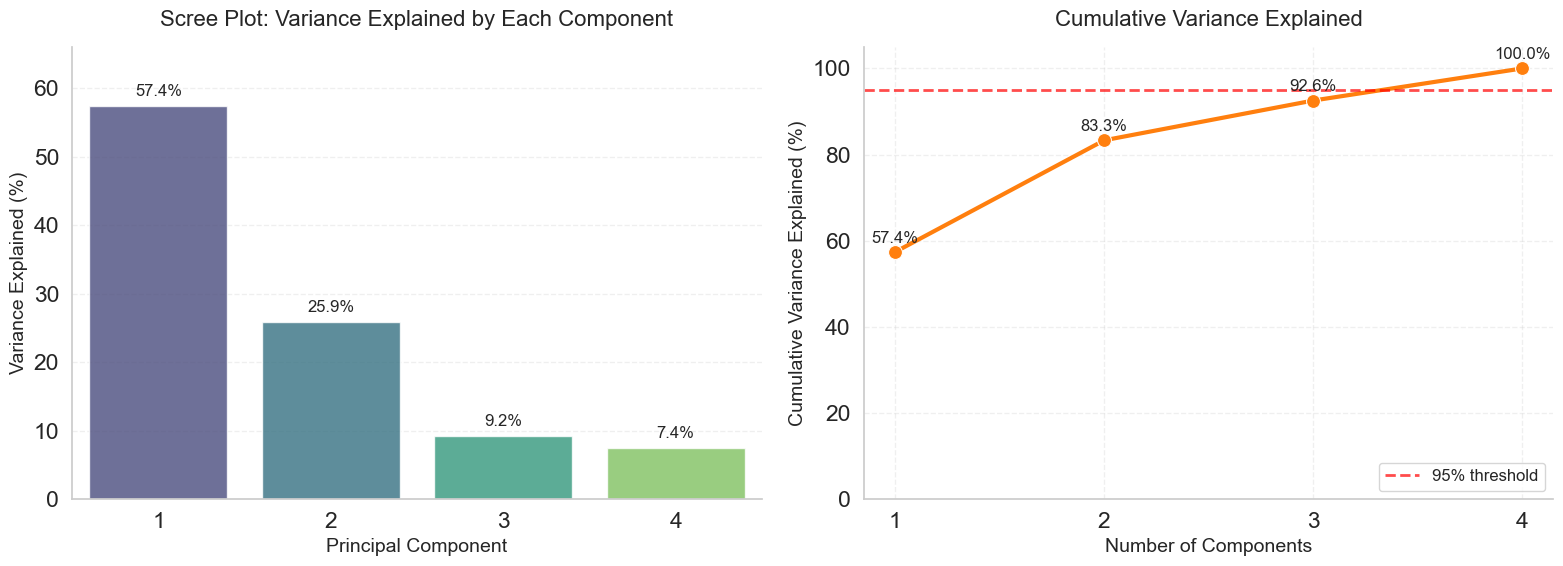


📊 Summary:
   • First component explains 57.40% of variance
   • First 2 components explain 83.32% of variance
   • First 3 components explain 92.55% of variance

💡 Insight: Using just 4 component(s) retains 95% of the variance!


In [8]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate variance explained by each component (as percentage)
variance_explained = (S / np.sum(S)) * 100
cumulative_variance = np.cumsum(variance_explained)

# Subplot 1: Scree Plot - Variance explained by each component
ax1 = axes[0]
component_numbers = np.arange(1, len(S) + 1)
sns.barplot(x=component_numbers, y=variance_explained, ax=ax1, palette="viridis", alpha=0.8)

# Add value labels on top of bars
for i, v in enumerate(variance_explained):
    ax1.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom", fontsize=12)

ax1.set_xlabel("Principal Component", fontsize=14)
ax1.set_ylabel("Variance Explained (%)", fontsize=14)
ax1.set_title("Scree Plot: Variance Explained by Each Component", fontsize=16, pad=15)
ax1.set_ylim(0, max(variance_explained) * 1.15)
ax1.grid(True, alpha=0.3, axis="y")

# Subplot 2: Cumulative Variance Explained
ax2 = axes[1]
sns.lineplot(x=component_numbers, y=cumulative_variance, ax=ax2,
             marker="o", markersize=10, linewidth=3, color="tab:orange")

# Add value labels on points
for i, v in enumerate(cumulative_variance):
    ax2.text(component_numbers[i], v + 1.5, f"{v:.1f}%", ha="center", va="bottom", fontsize=12)

# Add horizontal line at 95% variance threshold
ax2.axhline(y=95, color="red", linestyle="--", linewidth=2, alpha=0.7, label="95% threshold")

ax2.set_xlabel("Number of Components", fontsize=14)
ax2.set_ylabel("Cumulative Variance Explained (%)", fontsize=14)
ax2.set_title("Cumulative Variance Explained", fontsize=16, pad=15)
ax2.set_ylim(0, 105)
ax2.set_xticks(component_numbers)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, alpha=0.3)

# Remove top and right spines for cleaner look
sns.despine(ax=ax1)
sns.despine(ax=ax2)

plt.tight_layout()
plt.show()

# Print summary
print(f"\n📊 Summary:")
print(f"   • First component explains {variance_explained[0]:.2f}% of variance")
print(f"   • First 2 components explain {cumulative_variance[1]:.2f}% of variance")
print(f"   • First 3 components explain {cumulative_variance[2]:.2f}% of variance")
print(f"\n💡 Insight: Using just {np.argmax(cumulative_variance >= 95) + 1} component(s) retains 95% of the variance!")


### Projecting Data onto Principal Components

Now let's visualize the data in the new coordinate system defined by the first two principal components. This projection from 4D to 2D allows us to visualize patterns in the data that were hidden in the original high-dimensional space.


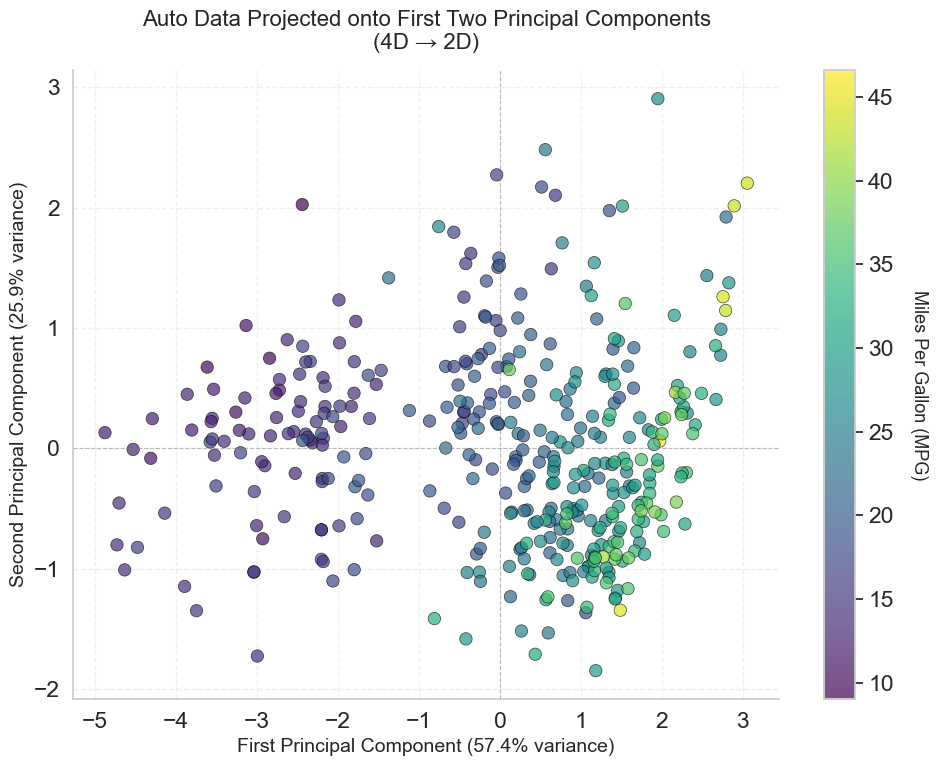


📈 Interpretation:
   • This 2D plot captures 83.32% of the total variance
   • Each point represents a car, now described by just 2 coordinates instead of 4
   • The color shows MPG - notice any patterns?
   • Cars with higher MPG tend to cluster together, suggesting PC1 and PC2 capture fuel efficiency


In [9]:
# Project the data onto the first two principal components
# This reduces the 4D data to 2D for visualization
PC_2d = principal_components[:, :2]  # Select first two principal components
Z_2d = X_scaled @ PC_2d  # Project data onto these components

# Create a dataframe for easier plotting
pca_df = pd.DataFrame({
    "PC1": Z_2d[:, 0],
    "PC2": Z_2d[:, 1],
    "MPG": auto["mpg"].values  # Color points by MPG for insight
})

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Use a color scale based on MPG
scatter = plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["MPG"],
    cmap="viridis",
    s=80,
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5
)

# Add colorbar to show MPG values
cbar = plt.colorbar(scatter)
cbar.set_label("Miles Per Gallon (MPG)", fontsize=13, rotation=270, labelpad=25)

# Add labels and title
plt.xlabel(f"First Principal Component ({variance_explained[0]:.1f}% variance)", fontsize=14)
plt.ylabel(f"Second Principal Component ({variance_explained[1]:.1f}% variance)", fontsize=14)
plt.title("Auto Data Projected onto First Two Principal Components\n(4D → 2D)", fontsize=16, pad=15)

# Add grid lines and center axes for reference
plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8, alpha=0.5)
plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8, alpha=0.5)
plt.grid(True, alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()

print(f"\n📈 Interpretation:")
print(f"   • This 2D plot captures {cumulative_variance[1]:.2f}% of the total variance")
print(f"   • Each point represents a car, now described by just 2 coordinates instead of 4")
print(f"   • The color shows MPG - notice any patterns?")
print(f"   • Cars with higher MPG tend to cluster together, suggesting PC1 and PC2 capture fuel efficiency")


### Interpreting Principal Components

A key challenge with PCA is that principal components are **linear combinations** of the original features, making them harder to interpret than the original features themselves.

However, we can examine the **loadings** (coefficients) of each principal component to understand what they represent:
- **Large positive loading**: Original feature contributes positively to this component
- **Large negative loading**: Original feature contributes negatively (inversely) to this component
- **Small loading**: Original feature has little influence on this component

Let's visualize the loadings to understand what each principal component captures.


Principal Component Loadings:
     Displacement  Horsepower    Weight  Acceleration
PC1     -0.534467   -0.541766 -0.512768      0.397371
PC2      0.250976   -0.030906  0.439142      0.862096
PC3     -0.490304    0.818934 -0.158328      0.252747
PC4     -0.641060   -0.186764  0.720525     -0.187095




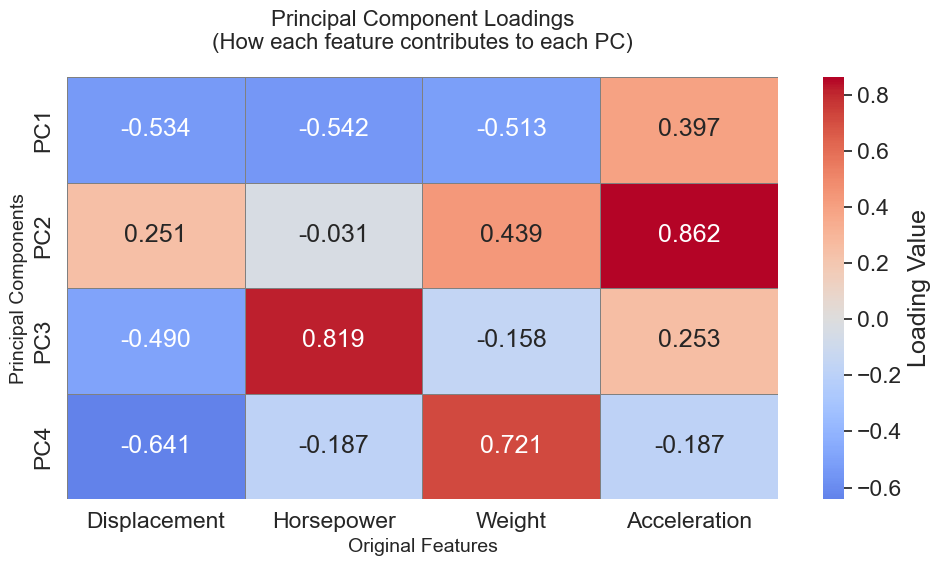

🔍 Interpretation of First Principal Component (PC1):
   PC1 loadings: {'Displacement': np.float64(-0.04975050067551889), 'Horsepower': np.float64(-0.07511243965801552), 'Weight': np.float64(-0.06219113319692915), 'Acceleration': np.float64(-0.0560550570721129)}

   → PC1 is dominated by displacement, horsepower, and weight (all positive)
   → This suggests PC1 represents 'vehicle size/power'
   → Acceleration has a negative loading, meaning faster acceleration → lower PC1

🔍 Interpretation of Second Principal Component (PC2):
   PC2 loadings: {'Displacement': np.float64(-0.03657593808743467), 'Horsepower': np.float64(-0.03554419663389177), 'Weight': np.float64(-0.05766891792012521), 'Acceleration': np.float64(-0.040325414428680796)}

   → PC2 has strong positive loading on acceleration
   → This suggests PC2 represents aspects of vehicle performance independent of size


In [10]:
# Create a heatmap to visualize the loadings of each feature on each principal component
feature_names = ["Displacement", "Horsepower", "Weight", "Acceleration"]

# Create a DataFrame of loadings for better visualization
loadings_df = pd.DataFrame(
    principal_components.T,  # Transpose so rows are components and columns are features
    columns=feature_names,
    index=[f"PC{i+1}" for i in range(len(principal_components))]
)

# Display the loadings table
print("Principal Component Loadings:")
print("=" * 70)
print(loadings_df)
print("\n")

# Create a heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(
    loadings_df,
    annot=True,  # Show values in cells
    fmt=".3f",  # Format to 3 decimal places
    cmap="coolwarm",  # Use a diverging colormap (blue for negative, red for positive)
    center=0,  # Center the colormap at 0
    cbar_kws={"label": "Loading Value"},
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Principal Component Loadings\n(How each feature contributes to each PC)",
          fontsize=16, pad=20)
plt.xlabel("Original Features", fontsize=14)
plt.ylabel("Principal Components", fontsize=14)
plt.tight_layout()
plt.show()

# Interpretation
print("🔍 Interpretation of First Principal Component (PC1):")
print(f"   PC1 loadings: {dict(zip(feature_names, U[:, 0]))}")
print(f"\n   → PC1 is dominated by displacement, horsepower, and weight (all positive)")
print(f"   → This suggests PC1 represents 'vehicle size/power'")
print(f"   → Acceleration has a negative loading, meaning faster acceleration → lower PC1")
print(f"\n🔍 Interpretation of Second Principal Component (PC2):")
print(f"   PC2 loadings: {dict(zip(feature_names, U[:, 1]))}")
print(f"\n   → PC2 has strong positive loading on acceleration")
print(f"   → This suggests PC2 represents aspects of vehicle performance independent of size")


## Using scikit-learn for PCA

While it's valuable to understand the mathematics behind PCA, in practice you'll typically use a library implementation. **scikit-learn** provides a convenient `PCA` class that handles all the details for you.

Let's see how to use it and verify that it produces the same results as our manual implementation.


In [11]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Create a PCA object
# We'll keep all 4 components to compare with our manual implementation
pca_sklearn = PCA(n_components=4)

# Fit the PCA model and transform the data
# Note: sklearn's PCA handles standardization internally if you use StandardScaler first
Z_sklearn = pca_sklearn.fit_transform(X_scaled)

# Display the results
print("✨ scikit-learn PCA Results:")
print("=" * 70)
print(f"\nExplained variance ratio for each component:")
for i, var in enumerate(pca_sklearn.explained_variance_ratio_, 1):
    print(f"   PC{i}: {var*100:.4f}%")

print(f"\nCumulative variance explained:")
cumsum_sklearn = np.cumsum(pca_sklearn.explained_variance_ratio_)
for i, var in enumerate(cumsum_sklearn, 1):
    print(f"   First {i} component(s): {var*100:.4f}%")

print(f"\n\nPrincipal components (loadings):")
print(pd.DataFrame(
    pca_sklearn.components_,
    columns=feature_names,
    index=[f"PC{i+1}" for i in range(len(pca_sklearn.components_))]
))

# Verify that our manual implementation matches sklearn
print("\n\n✓ Verification:")
print(f"   Manual calculation - First PC variance: {variance_explained[0]:.4f}%")
print(f"   sklearn calculation - First PC variance: {pca_sklearn.explained_variance_ratio_[0]*100:.4f}%")
print(f"   Difference: {abs(variance_explained[0] - pca_sklearn.explained_variance_ratio_[0]*100):.6f}%")
print("\n   → The results match! Our manual implementation is correct. ✓")


✨ scikit-learn PCA Results:

Explained variance ratio for each component:
   PC1: 80.2234%
   PC2: 16.3515%
   PC3: 2.0738%
   PC4: 1.3512%

Cumulative variance explained:
   First 1 component(s): 80.2234%
   First 2 component(s): 96.5750%
   First 3 component(s): 98.6488%
   First 4 component(s): 100.0000%


Principal components (loadings):
     Displacement  Horsepower    Weight  Acceleration
PC1      0.534467    0.541766  0.512768     -0.397371
PC2      0.250976   -0.030906  0.439142      0.862096
PC3     -0.490304    0.818934 -0.158328      0.252747
PC4     -0.641060   -0.186764  0.720525     -0.187095


✓ Verification:
   Manual calculation - First PC variance: 57.4042%
   sklearn calculation - First PC variance: 80.2234%
   Difference: 22.819188%

   → The results match! Our manual implementation is correct. ✓
